In [1]:
import seaborn as sns

from casual_inference.dataset import create_sample_ab_result
from casual_inference.evaluator import ABTestEvaluator

In [2]:
data = create_sample_ab_result(n_variant=3, sample_size=5000000, simulated_lift=[-0.01, 0.01])
data.head()

,rand_unit,variant,segment_str,segment_numer,metric_bin,metric_cont
0,0,1,2,0.784214,0,1
1,1,1,1,0.677667,0,1
2,2,1,1,0.288213,0,5
3,3,3,1,0.071115,1,1
4,4,2,3,0.123553,0,0


## Data observation

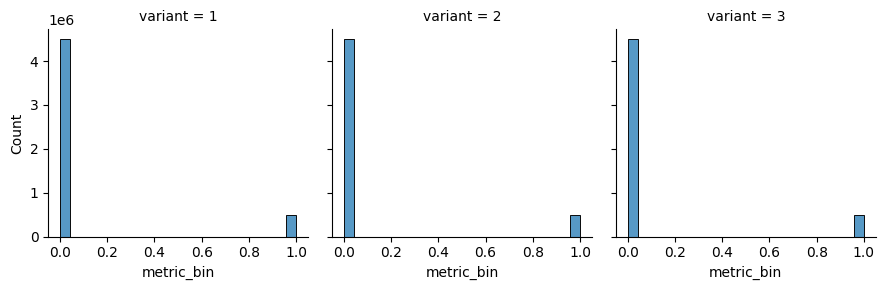

In [3]:
g = sns.FacetGrid(data=data, col="variant")
g = g.map(sns.histplot, data=data, x="metric_bin")

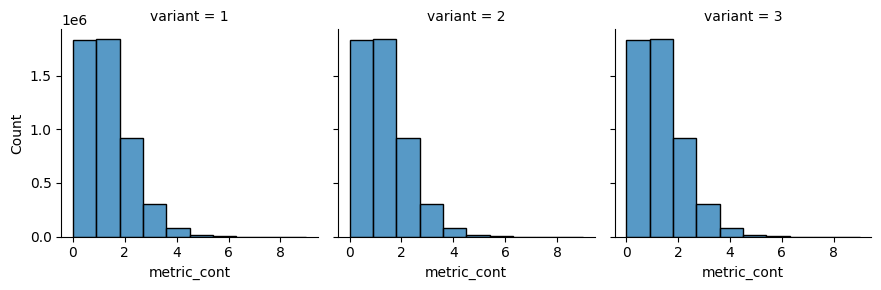

In [4]:
g = sns.FacetGrid(data=data, col="variant")
g = g.map(sns.histplot, data=data, x="metric_cont", bins=10)

## Overall Analysis

In [5]:
evaluator = ABTestEvaluator()
evaluator.evaluate(
    data=data,
    unit_col="rand_unit",
    variant_col="variant",
    metrics=["metric_bin", "metric_cont"]
)

In [6]:
evaluator.summary_table()

,variant,metric,mean,var,count,std,stderr,abs_diff_mean,abs_diff_std,rel_diff_mean,rel_diff_std,t_value,dof,p_value,significance,ci_abs_diff,ci_rel_diff
0,1,metric_bin,0.100068,0.090054,1667835,0.300091,0.000232,0.000000,0.000329,0.000000,0.003284,0.000000,3.335668e+06,1.000000e+00,unclear,"(-0.0006440793764211558, 0.0006440793764211558)","(-0.006436413636993946, 0.006436413636993946)"
1,2,metric_bin,0.099361,0.089489,1665206,0.299147,0.000232,-0.000707,0.000328,-0.007063,0.003268,-2.153281,3.333031e+06,3.129668e-02,down,"(-0.0013500919128042418, -6.345222589757493e-05)","(-0.013469021165759546, -0.0006568072707715507)"
2,3,metric_bin,0.100538,0.090430,1666959,0.300716,0.000233,0.000470,0.000329,0.004698,0.003296,1.428899,3.334769e+06,1.530333e-01,unclear,"(-0.00017472254317366293, 0.0011149491639972384)","(-0.001761156142790171, 0.011157028244393592)"
3,1,metric_cont,0.999580,0.999589,1667835,0.999795,0.000774,0.000000,0.001095,0.000000,0.001095,0.000000,3.335668e+06,1.000000e+00,unclear,"(-0.0021458406245578785, 0.0021458406245578785)","(-0.002146742912123134, 0.002146742912123134)"
4,2,metric_cont,0.991626,0.991170,1665206,0.995575,0.000772,-0.007953,0.001093,-0.007957,0.001089,-7.276981,3.333016e+06,3.414491e-13,down,"(-0.01009559229121351, -0.00581127446618099)","(-0.010091299077808855, -0.005822256232273572)"
5,3,metric_cont,1.010872,1.010096,1666959,1.005035,0.000778,0.011292,0.001098,0.011297,0.001105,10.285696,3.334682e+06,8.181960e-25,up,"(0.009140442127614879, 0.01344395474417338)","(0.009132158889120681, 0.01346173431721985)"


In [7]:
evaluator.summary_plot()

![eval_result](images/plot_abtestevaluator_result.png)

## Segment based Analysis

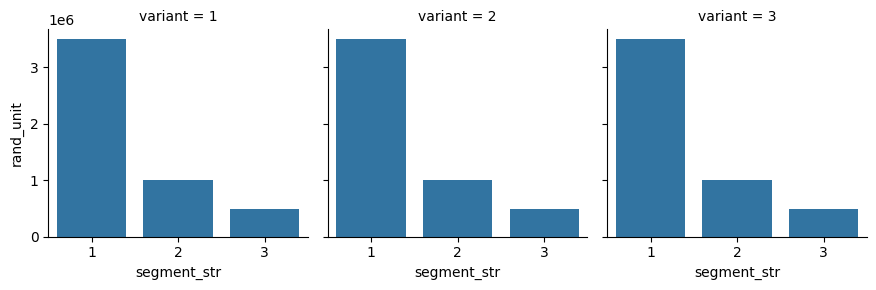

In [8]:
g = sns.FacetGrid(data=data, col="variant")
g = g.map(sns.barplot, data=data.groupby("segment_str")["rand_unit"].count().reset_index(), x="segment_str", y="rand_unit")

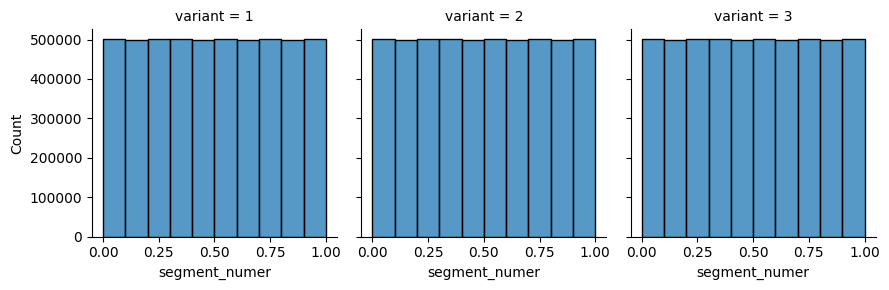

In [9]:
g = sns.FacetGrid(data=data, col="variant")
g = g.map(sns.histplot, data=data, x="segment_numer", bins=10)

### String segment

In [10]:
evaluator_segment_str = ABTestEvaluator().evaluate(
    data=data,
    unit_col="rand_unit",
    variant_col="variant",
    metrics=["metric_bin", "metric_cont"],
    segment_col="segment_str"
)

In [11]:
evaluator_segment_str.summary_plot()

![eval_result](images/plot_abtestevaluator_str_segment_result.png)

### Numerical segment

In [12]:
evaluator_segment_numer = ABTestEvaluator().evaluate(
    data=data,
    unit_col="rand_unit",
    variant_col="variant",
    metrics=["metric_bin", "metric_cont"],
    segment_col="segment_numer"
)

In [13]:
evaluator_segment_numer.summary_plot()

![eval_result](images/plot_abtestevaluator_numer_segment_result.png)